# AcadGild_DataScience_ML_Project_3


##### Created by Saurabh Gangrade


<b> Objective: </b> With the use of different Machine Learning model , predict whether person is making 50K pr less than in year. 

<p><p><b>Data Set Information:</b></p>
<p>Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))</p>
<p><b>Attribute Information:</b></p>
<p>Listing of attributes: </p>
<p>wage_class: 50K, &gt;=50K.</p>
<p>age: continuous. </p>
<p>workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.</p>
<p>fnlwgt: continuous.</p>
<p>education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.</p>
<p>education-num: continuous.</p>
<p>marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.</p>
<p>occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,</p>
<p>Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.</p>
<p>relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.</p>
<p>race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.</p>
<p>sex: Female, Male.</p>
<p>capital-gain: continuous.</p>
<p>capital-loss: continuous.</p>
<p>hours-per-week: continuous.</p>
<p>native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands</p>
    
</p>

In [ ]:
#Solution

### <b> Load Python Modules </b>

In [1]:
# Pyhton modules for Data and graphical operations
import pandas as pd # for dataframe and other data operations
import numpy as np # for numerical data data in dataframe
import matplotlib.pyplot as plt # to visualise data with matplotlib
import seaborn as sns # to visualise data with Seaborn
from IPython.display import Image, display  # to disaply decision tree
import pydotplus # to display Decision tree into image
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Python modules for Machine learning opeartions

from sklearn.model_selection import train_test_split , cross_val_score , KFold , GridSearchCV  , RandomizedSearchCV 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import classification_report , confusion_matrix , roc_curve  , auc , roc_auc_score , precision_recall_curve
from xgboost import plot_importance , plot_tree
from sklearn.preprocessing import LabelEncoder
# Machine Learning Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier , export_graphviz 
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier

### <b> Load Dataset </b>

In [3]:
# Function to get column labels from ucl data set libarary

def get_column_labels(url):
    ''' This function will return column labels from dataset library , sep=":" will get used for fetching labels name form adult.names file from dataset'''
    columns= pd.read_csv(filepath_or_buffer=url, sep=":")
    cols=columns.iloc[91:106,].index.tolist()
    cols= cols[1:]+cols[0::-1]
    return cols
    
    
url ='http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names'
# Aplly function to get columns
data_cols= get_column_labels(url)
print("The data columns are: \n" ,data_cols )
    

The data columns are: 
 ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '>50K, <=50K.']


As we can see , the data columns returned by function get_column_labels() consist of some unwanted names , which can be raplaced with meaningful names.

In [4]:
# Function to replace unwmanted names of  data columns with meaning ful names
# Note : This function wll remove and append data colsumn name at last postion , in order to that please arrange your data in that way.
 
def replace_name(datacols ,name_to_replace, name_to_append ):
    '''This function will replace unwanted data columns names with meaning ful column names'''
    if name_to_replace in datacols:
        datacols.remove(name_to_replace)
    if name_to_append not in data_cols:
        datacols.append(name_to_append)
    return datacols

In [5]:
# apply values to variables and fucntion
unwanted_name ='>50K, <=50K.'
meaningful_name='wage_class'
# Apply values to function
data_cols=replace_name(datacols=data_cols ,name_to_replace=unwanted_name , name_to_append= meaningful_name )

print("The recent data columns name are : \n",data_cols )

The recent data columns name are : 
 ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'wage_class']


In [6]:
# Note : in function , inside Pandas dataframe " skiprows =1 "  has been used to omit unwanted data from both train and test set

# Function to load dataset

def load_train_Dataset(dataset_url):
    '''This function will return train Dataframe based upon provided url and data columns'''
    df_train_data=pd.read_csv(filepath_or_buffer=dataset_url ,header=None  )
    return df_train_data
def load_test_Dataset(dataset_url):
    '''This function will return test Dataframe based upon provided url and data columns'''
    df_test_data=pd.read_csv(filepath_or_buffer=dataset_url ,header=None , skiprows= 1 )
    return df_test_data

In [7]:
# Apply values to variables
data_url='http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
col_names= data_cols # apply variables
#Apply values to function
df_training_AdultData= load_train_Dataset(dataset_url=data_url)
print("The Sample rows of Training data")
df_training_AdultData.head(2)

The Sample rows of Training data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [8]:
# Function to apply columns into dataframe

def apply_columns_to_dataframe(dataframe,cols):
    '''This function apply columns name to dataframe columns'''
    dataframe.columns=cols
    return dataframe    

In [9]:
# Apply values on function to get dataframe with columns
df_training_AdultData= apply_columns_to_dataframe(dataframe=df_training_AdultData ,cols=col_names )
print("Sample rows of Training data")
df_training_AdultData.head(2)

Sample rows of Training data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


### <b> Statistical and Descriptive Analysis of Training  Dataset </b>

In [10]:
# Get Shape & datattype informartmation about training data 

# function to get shape of dataset
def get_shape_of_dataset(df):
    '''This function will return shape(structure) of dataset based on dataframe'''
    shape_data="The No. Of rows in dataset : {0} & the No. Of columns in dataset : {1}" .format(df.shape[0] , df.shape[1])
    return shape_data                     

In [11]:
# apply values to get shape of dataset

# On training dataset df_training_AdultData
shape= get_shape_of_dataset(df_training_AdultData)
print("Shape of training dataset :\n",shape)

Shape of training dataset :
 The No. Of rows in dataset : 32561 & the No. Of columns in dataset : 15


In [12]:
# get Datatype and column information of dataset

# function to datatype and column information of dataset
def get_info_of_data(dataframe):
    '''This function will return data type and column information about dataset  based on dataframe '''
    info=dataframe.info()
    return info

In [13]:
# On training dataset df_training_AdultData
print("Datatype and column information about Training data \n")
print(get_info_of_data(df_training_AdultData),"\n")

Datatype and column information about Training data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None 



In [14]:
# trim whitespace from dataset if exist in data

def trim_whiteSpace(df):
    '''This function will trim white space from dataframe (if exist)'''
    df=df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  
    return df

In [15]:
# On training dataset df_training_AdultData , trim the white space
df_training_AdultData= trim_whiteSpace(df_training_AdultData)

In [16]:
# Check duplicate data in Dataset

def check_duplictes_value_in_data(df):
    '''This function will return count of duplicate value if exist in dataset'''  
    is_duplicate=df.duplicated().any()
    dupluicate_count=df.duplicated().sum()
    return is_duplicate , dupluicate_count

In [17]:
# On training dataset df_training_AdultData , remove duplicate values
isDuplicate, duplicateCount =check_duplictes_value_in_data(df_training_AdultData)
print("In Training/test dataset\n Is dataset having duplicate values :{0} , Total duplicates values in dataset:{1}".format(isDuplicate, duplicateCount))

In Training/test dataset
 Is dataset having duplicate values :True , Total duplicates values in dataset:24


In [18]:
#function to remove remove duplicate data
def remove_duplicate_in_dataset(df):
    ''' This function will remove duplicate data from datatset'''
    # first paramater used to keep first row/data in dataset and rest duplicate should get removed
    df=df.drop_duplicates(keep='first')
    return df

In [19]:
# Remove duplicates values and re-check shape of data and duplicate values count

# Remove duplicate values from dataset
df_training_AdultData=remove_duplicate_in_dataset(df_training_AdultData)

print("Check wether duplicate values exist in dataset after removal of duplicates\n")
print("In Training dataset\n Is dataset having duplicate values :{0} , Total duplicates values in dataset:{1}".format(check_duplictes_value_in_data(df_training_AdultData)[0] ,check_duplictes_value_in_data(df_training_AdultData)[1] ),"\n")

# Checck for structure of data after duplicate rows removal
print("For Training dataset\n",get_shape_of_dataset(df_training_AdultData))  

Check wether duplicate values exist in dataset after removal of duplicates

In Training dataset
 Is dataset having duplicate values :False , Total duplicates values in dataset:0 

For Training dataset
 The No. Of rows in dataset : 32537 & the No. Of columns in dataset : 15


In [20]:
# Function to Get unique values of string(object) type data

def get_unique_values_for_stringtype_Data(df):
    '''this function will dispaly string /categorical type data from dataset'''
    for col in df.select_dtypes(include=[np.object]).columns: # np.object is numpy variable to detect string/object type data
        print(col , " :" , df[col].unique(),"\n")

In [21]:
# On training dataset df_training_AdultData , get unique values of dataset

print("The unique values in Training dataset is:")
get_unique_values_for_stringtype_Data(df_training_AdultData)

The unique values in Training dataset is:
workclass  : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education  : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital-status  : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation  : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship  : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race  : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex  : ['Male' 'Female'] 

native-country  : ['United-States' 'Cuba' 'Jam

As per datatset , we can see that dataset contains unneeded values  " ? " and periods (.) in data. Thus before appling it for statistical and Machine learning model , let's omit this values.

Again , our object is to predict whether person is earning 50K less than -equal to or greater than that. Thus identify exiting data status.

In [22]:
# As per both train and test data set only Salary (wage_class) conatins periods values which can replaced  with without perod values

# check unique values of wage class variable 

#df_training_AdultData['wage_class']=df_training_AdultData['wage_class'].replace({'<=50K': '<=50K.', '>50K':'>50K.'})
print("The unique data in wage_class is :")
df_training_AdultData['wage_class'].unique()      
    

The unique data in wage_class is :


array(['<=50K', '>50K'], dtype=object)

In [23]:

# Function to replace value with periods(.) to non -period value if exist in dataset

def replace_preiod_values(data_wage_class , value_to_replace,  value_with_replace):
    ''' This function will replace wlaue with periods to non period value '''
    if value_to_replace in data_wage_class.values:
        data_wage_class.replace(to_replace=value_to_replace , value=value_with_replace , inplace=True)
    else:
        data_wage_class
    return data_wage_class    

In [24]:
# Apply function to replace value with periods(.) to non -period value if exist in dataset

df_training_AdultData['wage_class']=replace_preiod_values(data_wage_class=df_training_AdultData['wage_class'], value_to_replace='<=50K.', value_with_replace='<=50K')
df_training_AdultData['wage_class']=replace_preiod_values(data_wage_class=df_training_AdultData['wage_class'], value_to_replace='>50K.', value_with_replace='>50K')
print("The unique values of wage_class after replacing period values")
df_training_AdultData['wage_class'].unique()

The unique values of wage_class after replacing period values


array(['<=50K', '>50K'], dtype=object)

As we can see , lots of data in dataset contains " ? " which is unreadable and non-meaning full. It can be raplaced with "unknown".

In [25]:
# Function to replace " ? " with unknown or user defined value in entire dataframe

def replace_unneeded_value(dataframe,  value_to_replace, value_with_replace):
    '''This function will replace unneeded values with Unknown '''
    if value_to_replace in dataframe.values:
        dataframe.replace(to_replace=value_to_replace , value=value_with_replace , inplace=True)
    else:
        dataframe
    return dataframe

In [26]:
# Apply function to replace "? " with value "Unknown"

df_training_AdultData= replace_unneeded_value(dataframe=df_training_AdultData, value_to_replace="?" , value_with_replace="Unknown")

In [27]:
# Re-check wage-class and unneeded values in dataset for object(string) type data
# On training dataset df_training_AdultData , get unique values of dataset

print("The unique values in Training dataset is:")
get_unique_values_for_stringtype_Data(df_training_AdultData)

The unique values in Training dataset is:
workclass  : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education  : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital-status  : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation  : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Unknown'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship  : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race  : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex  : ['Male' 'Female'] 

native-country  : ['United-States'

In [28]:
# Function to check for NULL/NA in dataframe 
# function to get na values in dataset
def get_NA_values(df):
    ''' This function will return sum of NA values in dataset'''
    sum_na =df.isna().sum().sum()
    column_wise =df.isna().sum()
    return sum_na,column_wise

In [29]:
# Apply function to get null values count in training dataset
null_NA_values=get_NA_values(df_training_AdultData)

print("NULL/NA values in training dataset :",null_NA_values[0], "\n")
print("Columns wise NULL/NA values in training dataset :\n",null_NA_values[1])

NULL/NA values in training dataset : 0 

Columns wise NULL/NA values in training dataset :
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage_class        0
dtype: int64


As discussed , dataset consist of numerical and object(string ) type of data. Let's perform statistical and EDA(explonatory data ananlysis) on datatset.

In [30]:
# set display of decimal values till  decimal places.
pd.options.display.float_format = "{:.3f}".format # prnt values till 3 decimal places

In [31]:
#function to get Stattistical distribution of dataset
def get_stats_of_numerical_data(df):
    '''This frunction will return statistical ananlysis of numerical data'''
    stats= df.describe()
    return stats

# Descriptive Stats about  String type data
def get_stats_of_string_type_data(df):
    '''This function will return statistics for Object type data '''
    descriptive_stats=df.describe(include=[np.object]) # np.object for object type data
    return descriptive_stats

In [32]:
# Apply function on training dataset to get statistical analysis

print("Statistical analysis for numerical type of data")
get_stats_of_numerical_data(df_training_AdultData)


Statistical analysis for numerical type of data


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000,32537.000,32537.000,32537.000,32537.000,32537.000
mean,38.586,189780.849,10.082,1078.444,87.368,40.440
std,13.638,105556.471,2.572,7387.957,403.102,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,236993.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [33]:

print("Descriptive Statistical analysis for object type of data")
get_stats_of_string_type_data(df_training_AdultData)

Descriptive Statistical analysis for object type of data


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,wage_class
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


As we have to predict , that wether person makes 50K a year or less than that, Let's find existing ratio for wage in training dataset.

### <b> Baseline accuracy for wage class in training datatset </b>

In [34]:
def get_baseline_accuracy(df_Series):
    '''This function will return ratio of diffrent classes esisting in specific column/feature of dataset'''
    ratio= df_Series.value_counts(normalize=True)
    count= df_Series.value_counts()
    return ratio , count

In [35]:
# Apply function to get baseline accuracy for " wage_class"
print("The ratio of wage classes are :")
wage_ratio, wage_count =get_baseline_accuracy(df_training_AdultData['wage_class'])
print("Wage ratio :\n", wage_ratio,"\n")
print("Wage class (count) :\n", wage_count)

The ratio of wage classes are :
Wage ratio :
 <=50K   0.759
>50K    0.241
Name: wage_class, dtype: float64 

Wage class (count) :
 <=50K    24698
>50K      7839
Name: wage_class, dtype: int64


as we can see , as per training datatset 75.9% people earn less than or equal to 50K or less than a year and 24.1% people earn more than 50K per year.

As wage_class conatins string type of data which is hard to understaing for any machine learning algorithm. Thus replace string object with numerical values in wage_class.

In [36]:
#Function to map string object with numerical values wage class 

def replace_objectValues_with_numerical(dataframe , column_name, dict_values):
    '''This function will replace object values with numerical values in provided dataset column'''
    if dataframe[column_name].dtype==np.object:
        dataframe[column_name]=dataframe[column_name].map(dict_values)
    else:
        dataframe
    return dataframe               

In [37]:
# check unique values of wage_class

df_training_AdultData['wage_class'].unique()
    

array(['<=50K', '>50K'], dtype=object)

In [38]:
# Apply values on  function to replacr values 


# Let's consider persons who earns less than or eqaul to 50K marked as 0 and those who earns more than 50K marked as 1

values_dict= {'<=50K':0, '>50K':1} # mapping string string values with numericalclass values
colname='wage_class'
df_training_AdultData= replace_objectValues_with_numerical(dataframe=df_training_AdultData , column_name=colname , dict_values=values_dict)
print("Unique values of wage_class after replacing it with numerical values")
df_training_AdultData['wage_class'].unique()

Unique values of wage_class after replacing it with numerical values


array([0, 1], dtype=int64)

### <b> Data Visualisation </b>

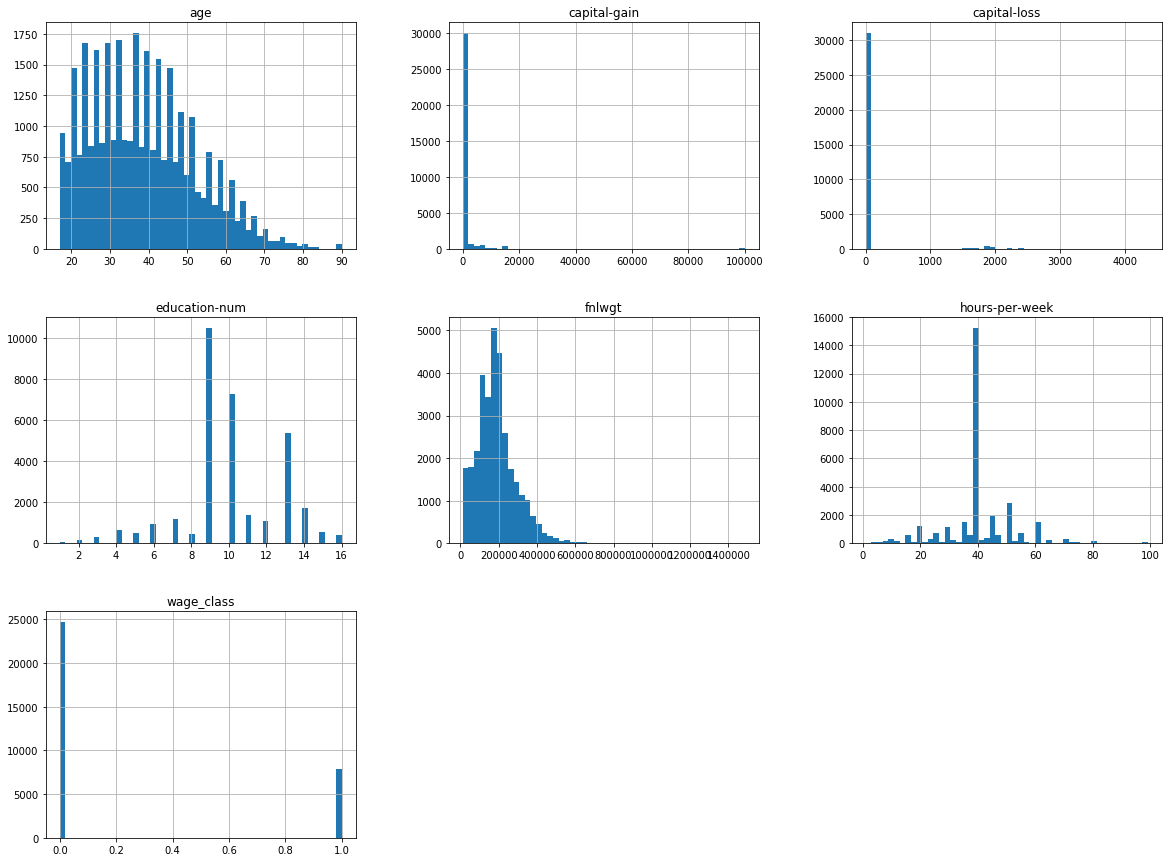

In [39]:
# Data Visualisation for Training Dataset for individual features
df_training_AdultData.hist(bins=50, figsize=(20,15))
plt.xticks(rotation=90)
plt.show()

In [40]:
# Distribution of data(other features in data) and wage class (salary)

def get_wage_class_relationship_withOtherFeatures( dataframe, dependent_variable ):
    '''This function returns plot for features dependecy and relationship between features & impact of target variable'''
    #Creating a scatter plots for all pairs of variables of train_set.
    pairPlot = sns.PairGrid(data=dataframe, hue=dependent_variable) # sns.PairGrid for pair plot using seaborn
    return pairPlot.map(plt.scatter) # plt.scatter for scatter type plot

The features dependency of dataset


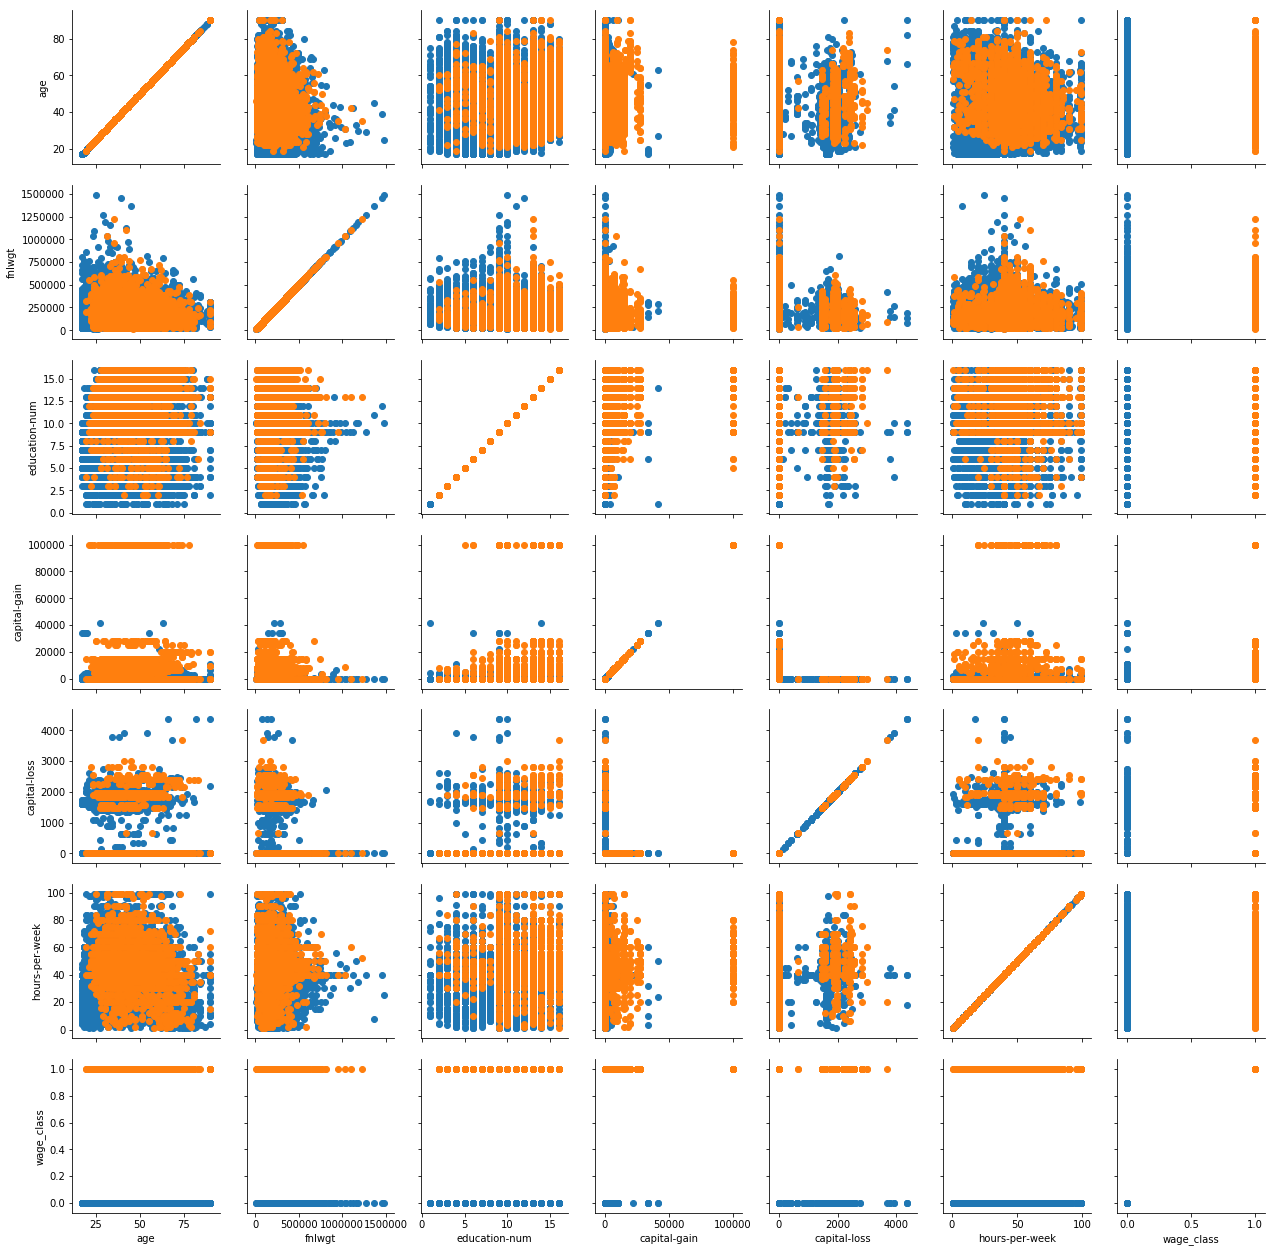

In [41]:
# Apply values on function to visualise data

print("The features dependency of dataset")
get_wage_class_relationship_withOtherFeatures(dataframe=df_training_AdultData , dependent_variable='wage_class')


Above mentioned data visualisation shows , data distribution in training dataset

### Data Pre-Processing


As we can see that , lots of features(columns) in dataset conatins string/object data. Many of machine learning algorithm would hard predict accuracy based upon those data. Thus in this process , perform <b>"One hot encoding"</b> to replace those string data with individual columns based on those data.

<b> One Hot Encoding </b>

In [42]:
#Select Object type columns from training dataset
def get_object_cols(dataframe):
    '''This function will return column name which has string/object type data in dataframe with column and its class data'''
    obj_cols= dataframe.dtypes[dataframe.dtypes == 'object'].index
    return obj_cols
    

In [43]:
# Applu function to get columns names from training dataset
print("Columns name(which have object type data) are:")
object_cols=get_object_cols(df_training_AdultData)
object_cols

Columns name(which have object type data) are:


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [44]:
# Check Structure of training dataframe
get_shape_of_dataset(df_training_AdultData)

'The No. Of rows in dataset : 32537 & the No. Of columns in dataset : 15'

In [45]:
#  Sample of Training dataset before changes
print("Sample of Training dataset before changes")
df_training_AdultData.head(2)

Sample of Training dataset before changes


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [46]:
# Apply object columns in dataset to get individual features with unique  values based upon data in object columns

def get_individual_feature_cols( datafarme, objct_cols):
    '''This function will add new feature/columns based upon object columns and remove those old object columns '''
    if any(x in objct_cols for x in datafarme.columns): # list comprehension for column check
        for cols in objct_cols:
            datafarme = datafarme.join(pd.get_dummies(datafarme[cols], prefix=cols).iloc[:,:-1])
        datafarme=datafarme.drop(objct_cols, axis=1)
    return datafarme  

In [47]:
# Apply function to get new feature columns from object columns
df_training_AdultData= get_individual_feature_cols(datafarme=df_training_AdultData, objct_cols=object_cols)

# Check shape of dataset 
get_shape_of_dataset(df_training_AdultData)

'The No. Of rows in dataset : 32537 & the No. Of columns in dataset : 101'

In [48]:
#  Sample of Training dataset after changes
print("Sample of Training dataset after changes")
df_training_AdultData.head(2)

Sample of Training dataset after changes


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage_class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### <b> Feature Selection for Train and Test dataset </b>

* Feature Selection for Train and Test dataset formed from training datatset for machine learning algorithms.

In [49]:
# Select Columns from Updated Training datatset
def get_columns_names(dataframe):
    '''This Function will return features name from datatset'''
    features= dataframe.columns
    return features

In [50]:
# Apply function to get values  on training dataset

features_names= get_columns_names(df_training_AdultData)
print("Columns name from updated dataset")
features_names

Columns name from updated dataset


Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'wage_class', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Unknown', 'native-country_Vietnam'],
      dtype='object', length=101)

In [51]:
# Function to select Dependent and independent features from Dataset

def select_dep_indep_features(dataframe , feature_name):
    '''This function will return list of dependent and independent feature names based upon feature name which need to be marked as dependent feature'''
    dep_feature=[x for x in dataframe.columns.tolist() if x==feature_name ]
    indep_feature=[x for x in dataframe.columns.tolist() if x!=feature_name ]
    return dep_feature , indep_feature
    

In [52]:
# apply values to function , to get dependent and independent features

# as we know that wage_class is our Target variable and other than that are our feature variables , 

# on training dataset
feature= 'wage_class'
# apply values on function to get dependent and independent features
features_list=select_dep_indep_features(dataframe=df_training_AdultData , feature_name=feature)

dependent_feature=features_list[0]
independent_feature=features_list[1]
print("The List of dependent feature:\n",dependent_feature , "\n" )
print("The List of independent feature:\n",independent_feature )

The List of dependent feature:
 ['wage_class'] 

The List of independent feature:
 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupati

In [53]:
# Select Features dataset and target label based upon dependent and indepnedet features

# Function to select Features dataset and target label based upon dependent and indepnedet features

def get_Feature_target_dataset( dataframe , dep_var , indep_var):
    '''This function will return Dataset with dependent and independent features'''
    df_target= dataframe[dep_var]
    df_feature=dataframe[indep_var]
    return df_target , df_feature

In [54]:
# apply values on function to get feature and target dataset

df_Target , df_Feature = get_Feature_target_dataset( dataframe=df_training_AdultData , dep_var= dependent_feature , indep_var= independent_feature)

In [55]:
print("Sample rows for Target dataset (df_Target) are :")
df_Target.head()

Sample rows for Target dataset (df_Target) are :


,wage_class
0,0
1,0
2,0
3,0
4,0


In [56]:
print("Sample rows for Feature dataset (df_Feature) are :")
df_Feature.head()

Sample rows for Feature dataset (df_Feature) are :


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### <b> Split the Target and Feature variable into Train and Test dataset </b>

In [57]:
# Function to split target and feature dataset into Train and Test set 
# Note: train_test_split( ) method return array of same size. Thus must pass array's in sequence to get the same order
def create_train_test_set(feature_dataset, target_dataset):
    '''This function will split Feature and target dataset into train and test dataset using train_test_split() method'''
    # using train_test_split() , we split the data into 70:30 ratio of train and test set for Machine learning model. np.ravel() used to set traget variable into 1-D array.
    x_train , x_test, y_train , y_test = train_test_split(feature_dataset , np.ravel(target_dataset) , shuffle=True, random_state=10, test_size=0.3)
    return x_train , x_test, y_train , y_test
    

In [58]:
# Apply function to get Train and test set for Feature and target variables

X_Train , X_Test , y_Train , y_Test= create_train_test_set(feature_dataset=df_Feature , target_dataset=df_Target)



print("The Shape of Feature (X_Train) Training set : ",X_Train.shape )
print("The Shape of target (y_Train) Training set : ",y_Train.shape )
print("The Shape of Feature (X_Test)  Test set : ",X_Test.shape )
print("The Shape of target (y_Test) Test set : ",y_Test.shape )

The Shape of Feature (X_Train) Training set :  (22775, 100)
The Shape of target (y_Train) Training set :  (22775,)
The Shape of Feature (X_Test)  Test set :  (9762, 100)
The Shape of target (y_Test) Test set :  (9762,)


## Apply Machine Learning Model

<b> Applying XGBoost model (XGboost Classifier) </b> 

In [59]:
# Import XGboostClassifier from xgboost.sklearn

from xgboost.sklearn import XGBClassifier 

In [60]:
# Define parameter for XGBoost model
params = {'objective':'binary:logistic' , 'max_depth':7, 'learning_rate':1.0,'silent':True , 'booster':'gbtree',
         'n_estimators':400,  'random_state':15 ,'subsample':0.6,'gamma':0.9 , 'n_jobs':10}

In [61]:
# Funtion to apply XGBoost model

def XGBoost_Model(feature_variable, target_variable , parameter):
    '''This function return XGBoost model which has been fitted with Train/Test variable returned by dataframe'''
    XGB_model_clf= XGBClassifier(**params)
    xgb_model =XGB_model_clf.fit(X=feature_variable, y=target_variable)
    return xgb_model

In [62]:
# Apply Training variables ( feature and target) &  params variable to XGboostmodel & fitting variable into model
params # paramters for XGBoost model
# Apply Feature, targte and params variable to XGboostmodel
xgboost_model = XGBoost_Model(feature_variable=X_Train , target_variable=y_Train , parameter=params)
print("XGboost model after fitting Feature and Target variable")   
xgboost_model

XGboost model after fitting Feature and Target variable


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.9, learning_rate=1.0, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=10, nthread=None, objective='binary:logistic',
       random_state=15, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

<b>Predict target variable and target variable probabilities</b>

In [63]:
# predict probabilities and values for Target variable

def predict_target_variable_prob_values(feature_variable , model):
    '''This function will return predicted target variable and its predicted probablities'''
    y_pred=model.predict(feature_variable)
    y_pred_prob=model.predict_proba(feature_variable)
    return y_pred , y_pred_prob

In [64]:
# Apply function to get Predicted target variable and predicted targte variable probabilities

y_train_pred_val, y_train_pred_prob = predict_target_variable_prob_values(feature_variable=X_Train ,model=xgboost_model)

print("Predicted target variable (first 5 values):",y_train_pred_val[0:5])
print("Predicted target variable probabilities (first 5 values):\n",y_train_pred_prob[0:5])

Predicted target variable (first 5 values): [0 0 0 0 0]
Predicted target variable probabilities (first 5 values):
 [[9.0534627e-01 9.4653711e-02]
 [9.9879378e-01 1.2062467e-03]
 [9.9991310e-01 8.6902037e-05]
 [9.9999952e-01 4.5277238e-07]
 [9.9999982e-01 1.5824722e-07]]


<b> Model Evaluation </b>

Confusion_matrix , Classification report , accuracy score, f-1 score , recall score, precision score , roc_auc curve, auc , precision_recall_curve


In [65]:
#get Confusion matrix and Classification report based on actual and predicted target variable

# Function for confusion matrix
def get_confusion_matrix(actual_target_variable,predicted_target_variable):
    '''This function will return Confusion matrix based upon actual and predicted target variable'''
    matrix = confusion_matrix(y_true=actual_target_variable , y_pred=predicted_target_variable)
    return matrix
#function for classification report
def get_classification_report(actual_target_variable,predicted_target_variable):
    '''This function will return classification report based upon actual and predicted target variable'''
    report = classification_report(y_true=actual_target_variable , y_pred=predicted_target_variable , target_names=['<=50K' , '>50K'])
    return report

#function for visual representation of confusion matrix
def get_visual_confusion_matrix(actual_target_variable,predicted_target_variable):
    '''This function will return graphical representation of confusion matix generated by actual and predicted target variable'''
    matrix = confusion_matrix(y_true=actual_target_variable , y_pred=predicted_target_variable)
    confusion_matrix_graph = pd.DataFrame(matrix, range(2), range(2))
    sns.set(font_scale=0.9)#for label size
    print("Confusion Matrix for Actual and Predicted target variable")
    return sns.heatmap(confusion_matrix_graph, annot=True, annot_kws={"size": 25}, fmt='.4g',xticklabels=['Pred : False(sal <=50k)','Pred : True(sal >50k)'], yticklabels=['Actual : False(sal <=50k)','Actual : True(sal >50k)'],)# font size

Confusion matrix for training set :
 [[17296     6]
 [   33  5440]] 

Classification report for training set :
               precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     17302
        >50K       1.00      0.99      1.00      5473

   micro avg       1.00      1.00      1.00     22775
   macro avg       1.00      1.00      1.00     22775
weighted avg       1.00      1.00      1.00     22775

Confusion Matrix for Actual and Predicted target variable


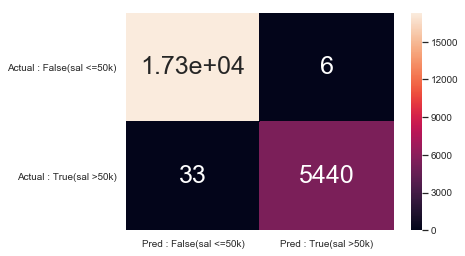

In [66]:
# Apply Actual target variable and Predicted target variable to get classification report and consfusion matrix

#Applyvalues to variables
actual_target_variable= y_Train
predicted_target_variable=y_train_pred_val


print("Confusion matrix for training set :\n",get_confusion_matrix(actual_target_variable,predicted_target_variable), "\n")
print("Classification report for training set :\n",get_classification_report(actual_target_variable,predicted_target_variable))
# Confusion Matrix for Actual and Predicted target variable
get_visual_confusion_matrix(actual_target_variable,predicted_target_variable)

In [67]:
# Model evaluation scores

def get_model_eavluation_scores(actual_target_variable,predicted_target_variable ):
    '''This function returns model acurracy score, precision score , recall score and F1-score'''
    acc_score= accuracy_score(y_true=actual_target_variable , y_pred=predicted_target_variable)
    prec_score=precision_score(y_true=actual_target_variable , y_pred=predicted_target_variable)
    recl_score= recall_score(y_true=actual_target_variable, y_pred=predicted_target_variable)
    f1score= f1_score(y_true= actual_target_variable, y_pred=predicted_target_variable)
    return acc_score , prec_score , recl_score , f1score

In [68]:
# Apply values to get model evaluation score

actual_target_variable,predicted_target_variable = y_Train , y_train_pred_val

# Apply values on function 

accuracy_Score_train_set , precision_Score_train_set , recall_Score_train_set , f1_Score_train_set = get_model_eavluation_scores(actual_target_variable,predicted_target_variable)


print("Model Accuracy score (on train set) :", accuracy_Score_train_set )
print("Model Precision score (on train set) :", precision_Score_train_set )
print("Model Recall score (on train set) :", recall_Score_train_set)
print("Model F-1 score (on train set) :", f1_Score_train_set)

Model Accuracy score (on train set) : 0.9982875960482985
Model Precision score (on train set) : 0.9988982739625413
Model Recall score (on train set) : 0.9939704001461721
Model F-1 score (on train set) : 0.9964282443447202


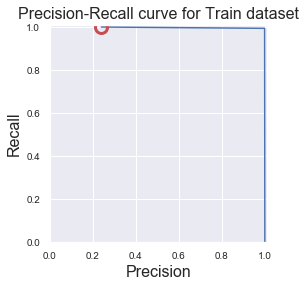

In [69]:
#  Precision-recall curves for Train set

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_true=y_Train , probas_pred=y_train_pred_prob[:,1]>0.5  )
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.title('Precision-Recall curve for Train dataset', fontsize=16)
plt.show()

### <b> Feature Selection based on model </b>

### <b> Problem 2: Which factors are important </b>

In [70]:
# From XGBoost model , Select important features
xgboost_model.feature_importances_

array([1.8784080e-01, 3.6461300e-01, 5.5749979e-02, 1.0173354e-02,
       7.9759099e-03, 9.8315291e-02, 4.6390495e-03, 6.9992677e-03,
       0.0000000e+00, 1.8556198e-02, 5.6970781e-03, 1.0743062e-02,
       3.0113128e-03, 3.0113128e-03, 1.4649630e-03, 1.3021893e-03,
       4.0693415e-04, 0.0000000e+00, 8.1386832e-05, 4.8832101e-04,
       3.2554733e-04, 2.6857655e-03, 5.6970781e-03, 1.1068610e-02,
       0.0000000e+00, 1.3510214e-02, 5.8598518e-03, 0.0000000e+00,
       1.2208024e-03, 6.6737202e-03, 0.0000000e+00, 8.3014565e-03,
       2.4416050e-04, 6.1040125e-03, 4.8832101e-04, 8.6270040e-03,
       0.0000000e+00, 1.3347440e-02, 1.4731017e-02, 3.0113128e-03,
       2.8485390e-03, 7.4875886e-03, 4.4762758e-03, 0.0000000e+00,
       1.3672988e-02, 3.3368601e-03, 1.1312770e-02, 4.5576626e-03,
       7.3248148e-03, 1.2696345e-02, 8.3828438e-03, 8.1386830e-04,
       2.5229917e-03, 4.0693418e-03, 2.4416050e-04, 2.9299259e-03,
       6.6737202e-03, 8.1386832e-05, 1.1149996e-02, 0.0000000e

As available , This " xgboost_model.feature_importances_ " returns features importance ratio , Let's align them with feature names

In [71]:
# Feature names from Train dataset
X_Train.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Unknown', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-m

In [72]:
# Arrange feature name and respective importance ration in dataframe
#Function to Get dataframe with feature columns and importance ratio

def get_feature_ratio(features, ratio):
    ''' This function will return dataframe with feature columns and importance ratio '''
    df_feature_importances = pd.DataFrame({'feature':features,'importance':np.round(ratio,4)})
    df_feature_importances = df_feature_importances.sort_values('importance',ascending=False)
    return df_feature_importances

# Apply values on function 

df_feature_importances =get_feature_ratio( features= X_Train.columns  , ratio=xgboost_model.feature_importances_)
print("Feature an d importance ratio")
df_feature_importances

Feature an d importance ratio


,feature,importance
1,fnlwgt,0.365
0,age,0.188
5,hours-per-week,0.098
2,education-num,0.056
9,workclass_Private,0.019
38,occupation_Exec-managerial,0.015
44,occupation_Prof-specialty,0.014
25,education_HS-grad,0.014
37,occupation_Craft-repair,0.013
49,relationship_Husband,0.013


As df_feature_importance , returns all features with their importance in decending order , Let's select important feature with importance ratio more than 0.010. 

In [73]:
# Select feature with importance ration more than 0.010

df_important_features=df_feature_importances[df_feature_importances.importance>=0.010]
df_important_features

,feature,importance
1,fnlwgt,0.365
0,age,0.188
5,hours-per-week,0.098
2,education-num,0.056
9,workclass_Private,0.019
38,occupation_Exec-managerial,0.015
44,occupation_Prof-specialty,0.014
25,education_HS-grad,0.014
37,occupation_Craft-repair,0.013
49,relationship_Husband,0.013


In [74]:
# Function for Graphical representaion of important features


def get_visual_feature_importance(feature, importance_ratio):
    '''This function will return graphicla reprentation of important features using seaborn (sns) '''
    plt.figure(figsize=(15,10))
    return sns.barplot(x=importance_ratio , y=feature)


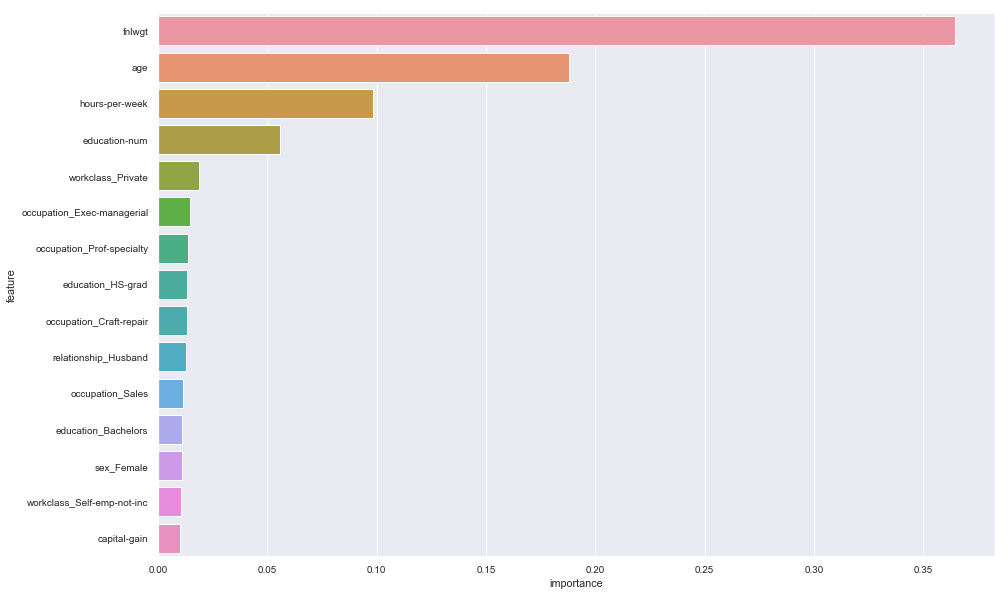

In [75]:
# Apply values on function get feature importance (graphical representation)

get_visual_feature_importance( feature= df_important_features.feature , importance_ratio=df_important_features.importance )

<b>Note :  Problem 2 ends </b>

As we have got , important features , lets evaluate test set ( X_Test( features dataset) , y_Test(target dataset) )( formed from training dataset).

In [76]:
important_cols = df_important_features.feature.values
print(" Important features(columns) returned by model")
important_cols

 Important features(columns) returned by model


array(['fnlwgt', 'age', 'hours-per-week', 'education-num',
       'workclass_Private', 'occupation_Exec-managerial',
       'occupation_Prof-specialty', 'education_HS-grad',
       'occupation_Craft-repair', 'relationship_Husband',
       'occupation_Sales', 'education_Bachelors', 'sex_Female',
       'workclass_Self-emp-not-inc', 'capital-gain'], dtype=object)

<b> Test set evaluation (X_Test, y_Test) </b>

* With importnatnt features returned by model.

In [77]:
# Features Test dataset

X_Test.head(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam
2289,42,121718,9,0,0,24,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21420,17,142964,7,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [78]:
# Target Test Dataset ( first 10 values)
y_Test[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [79]:
# Let's re-fit the model with importanta features on test set 

print(" Function for model -: XGBoost_Model() :", XGBoost_Model.__doc__)

print("params for model :",params)

# Apply Feature, targte and params variable to XGboostmodel with important features returned by model on train set
xgboost_model = XGBoost_Model(feature_variable=X_Test[important_cols] , target_variable=y_Test , parameter=params)


 Function for model -: XGBoost_Model() : This function return XGBoost model which has been fitted with Train/Test variable returned by dataframe
params for model : {'objective': 'binary:logistic', 'max_depth': 7, 'learning_rate': 1.0, 'silent': True, 'booster': 'gbtree', 'n_estimators': 400, 'random_state': 15, 'subsample': 0.6, 'gamma': 0.9, 'n_jobs': 10}


In [80]:
# Apply features set on function to preidtc target variables and probabilities

print("Function for Target variable and probabilities predict_target_variable_prob_values() :" , predict_target_variable_prob_values.__doc__ , "\n")

# Apply test set with important features to get targte variable values and probabilities

y_test_pred_val , y_test_pred_prob= predict_target_variable_prob_values( feature_variable=X_Test[important_cols] , model= xgboost_model)


print("Predicted target variable (first 5 values) on Test set:",y_test_pred_val[0:5])
print("Predicted target variable probabilities (first 5 values) on Test set:\n",y_test_pred_prob[0:5])

Function for Target variable and probabilities predict_target_variable_prob_values() : This function will return predicted target variable and its predicted probablities 

Predicted target variable (first 5 values) on Test set: [0 0 0 0 0]
Predicted target variable probabilities (first 5 values) on Test set:
 [[9.9992865e-01 7.1320195e-05]
 [1.0000000e+00 2.0602572e-13]
 [9.8553348e-01 1.4466530e-02]
 [9.4276834e-01 5.7231639e-02]
 [1.0000000e+00 5.5302779e-10]]


 Function for Confusion matrix - :get_confusion_matrix() This function will return Confusion matrix based upon actual and predicted target variable 

Confusion matrix for training set :
 [[7393    3]
 [   1 2365]] 

 Function for Classification Report get_classification_report() - : This function will return classification report based upon actual and predicted target variable 

Classification report for training set :
               precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00      7396
        >50K       1.00      1.00      1.00      2366

   micro avg       1.00      1.00      1.00      9762
   macro avg       1.00      1.00      1.00      9762
weighted avg       1.00      1.00      1.00      9762

 Function for Confusion matrix graph get_visual_confusion_matrix() - : This function will return graphical representation of confusion matix generated by actual and predicted target variable 

Confusion Matrix for Actual and Predicted target variabl

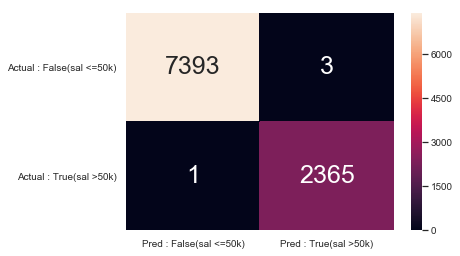

In [81]:
# Apply Actual target variable and Predicted target variable to get classification report and consfusion matrix

#Applyvalues to variables
actual_target_variable= y_Test
predicted_target_variable=y_test_pred_val

print(" Function for Confusion matrix - :get_confusion_matrix()", get_confusion_matrix.__doc__, "\n")

print("Confusion matrix for training set :\n",get_confusion_matrix(actual_target_variable,predicted_target_variable), "\n")

print(" Function for Classification Report get_classification_report() - :",get_classification_report.__doc__, "\n")
print("Classification report for training set :\n",get_classification_report(actual_target_variable,predicted_target_variable))
# Confusion Matrix for Actual and Predicted target variable

print(" Function for Confusion matrix graph get_visual_confusion_matrix() - :",get_visual_confusion_matrix.__doc__, "\n")
get_visual_confusion_matrix(actual_target_variable,predicted_target_variable)

In [82]:
# Apply values to get model evaluation score

actual_target_variable,predicted_target_variable = y_Test , y_test_pred_val

# Apply values on function 

accuracy_Score_test_set , precision_Score_test_set , recall_Score_test_set , f1_Score_test_set = get_model_eavluation_scores(actual_target_variable,predicted_target_variable)


print("Model Accuracy score (on test set):", accuracy_Score_test_set )
print("Model Precision score (on test set):", precision_Score_test_set )
print("Model Recall score (on test set):", recall_Score_test_set )
print("Model F-1 score (on test set):", f1_Score_test_set )

Model Accuracy score (on test set): 0.9995902479000205
Model Precision score (on test set): 0.9987331081081081
Model Recall score (on test set): 0.9995773457311918
Model F-1 score (on test set): 0.9991550485847063


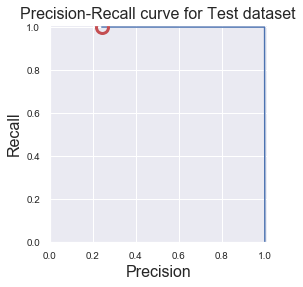

In [83]:
# Precision recall curve on test set

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_true=y_Test , probas_pred=y_test_pred_prob[:,1]>0.5  )
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.title('Precision-Recall curve for Test dataset', fontsize=16)
plt.show()

ROC AUC: 0.00


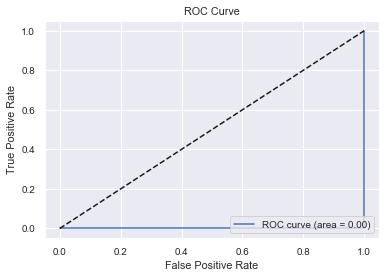

ROC AUC: 1.00


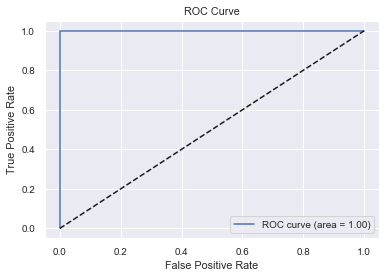

In [84]:
##Plot ROC Curve and caluclate AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

for i in range(2): # as there are two classes ('<=50K and >50K') in our dataset for prediciton
    
    # Determine the false negative and true negative rates (when i = 0)
    # Determine the false positive and true positive rates (when i = 1)
    fpr, tpr, _ = roc_curve(y_Test, y_test_pred_prob[:,i])

    # Calculate the AUC (area under curve)
    roc_auc = auc(fpr, tpr)
    print('ROC AUC: %0.2f' % roc_auc)

    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

Conclusion from ROC Curve :
IN curve-1 (used for class 0 : salary <=50k) : AUC - 0 and prediction for this class is happening perfectly.
IN curve-2 (used for class 1 : salary  >50k) : AUC - 1 and prediction for this class is happening perfectly.

In [85]:
#Feature importance ration on test set after updated XGboost model based on Test set
print("Function for Feature ratio get_feature_ratio():",get_feature_ratio.__doc__)
df_feature_importances_test =get_feature_ratio( features= X_Test[important_cols].columns  , ratio=xgboost_model.feature_importances_)
df_feature_importances_test

Function for Feature ratio get_feature_ratio():  This function will return dataframe with feature columns and importance ratio 


,feature,importance
0,fnlwgt,0.429
1,age,0.217
2,hours-per-week,0.102
3,education-num,0.071
4,workclass_Private,0.031
12,sex_Female,0.022
9,relationship_Husband,0.021
5,occupation_Exec-managerial,0.016
6,occupation_Prof-specialty,0.016
7,education_HS-grad,0.015


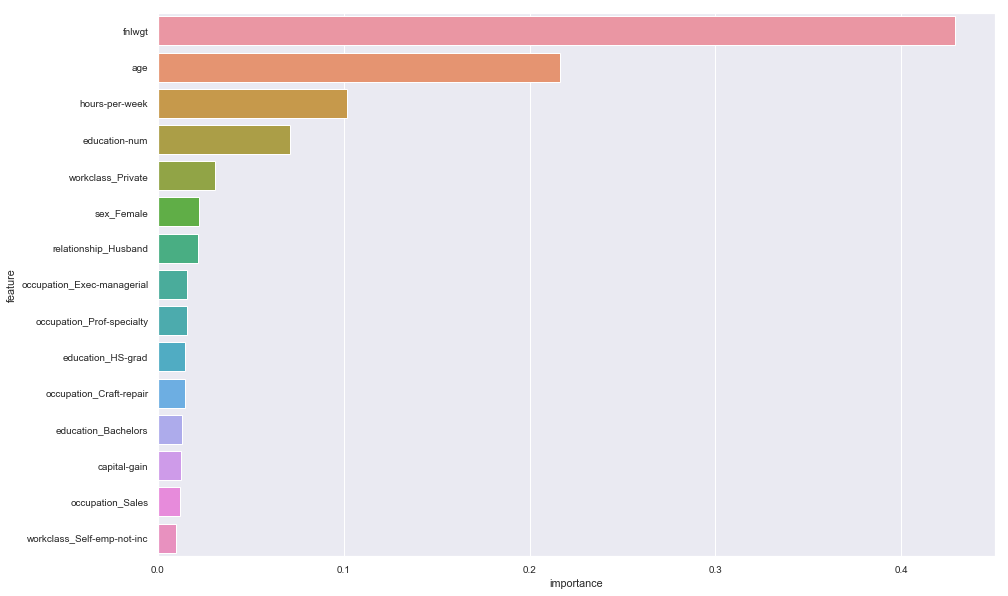

In [86]:
# Apply values on function get feature importance (graphical representation)  based on Test set

get_visual_feature_importance( feature= df_feature_importances_test.feature , importance_ratio=df_feature_importances_test.importance )

After Applying model on Test Set and Training set , whereses <b> test set applied with important columns</b> wheres Train set applies with all features. We can observe that model accuracy score and other evaluation score has been increased.

### <b> Problem 1: Prediction task is to determine whether a person makes over 50K a year.</b> 

In [87]:
# Columns based upon which predicttion has to be done
X_Test[important_cols].columns

Index(['fnlwgt', 'age', 'hours-per-week', 'education-num', 'workclass_Private',
       'occupation_Exec-managerial', 'occupation_Prof-specialty',
       'education_HS-grad', 'occupation_Craft-repair', 'relationship_Husband',
       'occupation_Sales', 'education_Bachelors', 'sex_Female',
       'workclass_Self-emp-not-inc', 'capital-gain'],
      dtype='object')

In [88]:
#Sample rows from test set based on important columns
X_Test[important_cols].head(2)

,fnlwgt,age,hours-per-week,education-num,workclass_Private,occupation_Exec-managerial,occupation_Prof-specialty,education_HS-grad,occupation_Craft-repair,relationship_Husband,occupation_Sales,education_Bachelors,sex_Female,workclass_Self-emp-not-inc,capital-gain
2289,121718,42,24,9,0,0,0,1,1,1,0,0,0,1,0
21420,142964,17,20,7,1,0,0,0,0,0,0,0,0,0,0


In [89]:
# Test Data  for wage calculation

df_Problem = pd.DataFrame(index=['emp_1','emp_2'], columns=X_Test[important_cols].columns.tolist())
df_Problem # Temporarily dataframe

,fnlwgt,age,hours-per-week,education-num,workclass_Private,occupation_Exec-managerial,occupation_Prof-specialty,education_HS-grad,occupation_Craft-repair,relationship_Husband,occupation_Sales,education_Bachelors,sex_Female,workclass_Self-emp-not-inc,capital-gain
emp_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# Update Data Frame with random values from test dataset
df_Problem.loc['emp_2'] =X_Train[important_cols].iloc[295]
df_Problem.loc['emp_1'] =X_Train[important_cols].iloc[106]

df_Problem


,fnlwgt,age,hours-per-week,education-num,workclass_Private,occupation_Exec-managerial,occupation_Prof-specialty,education_HS-grad,occupation_Craft-repair,relationship_Husband,occupation_Sales,education_Bachelors,sex_Female,workclass_Self-emp-not-inc,capital-gain
emp_1,289653,37,50,9,0,0,0,1,0,1,0,0,0,0,0
emp_2,284403,43,60,12,1,0,0,0,0,1,1,0,0,0,0


In [91]:
# test : 1 Whether employee 1 makes earning more than 50K or not

pd.DataFrame(df_Problem.loc['emp_1']).T # .T for Transpose

,fnlwgt,age,hours-per-week,education-num,workclass_Private,occupation_Exec-managerial,occupation_Prof-specialty,education_HS-grad,occupation_Craft-repair,relationship_Husband,occupation_Sales,education_Bachelors,sex_Female,workclass_Self-emp-not-inc,capital-gain
emp_1,289653,37,50,9,0,0,0,1,0,1,0,0,0,0,0


In [92]:
# apply values on model to predict earning

earning_predicted = xgboost_model.predict(pd.DataFrame(df_Problem.loc['emp_1']).T)

print("\nThe predicted wage_class is:",earning_predicted[0] )

if earning_predicted[0] == 0:
    print("\nThis employee doesn't makes over 50K a year.")
else:
    print("\nThis employee makes over 50K a year.")




The predicted wage_class is: 0

This employee doesn't makes over 50K a year.


In [93]:
# test : 1 Whether employee 1 makes earning more than 50K or not

pd.DataFrame(df_Problem.loc['emp_2']).T # .T for Transpose

,fnlwgt,age,hours-per-week,education-num,workclass_Private,occupation_Exec-managerial,occupation_Prof-specialty,education_HS-grad,occupation_Craft-repair,relationship_Husband,occupation_Sales,education_Bachelors,sex_Female,workclass_Self-emp-not-inc,capital-gain
emp_2,284403,43,60,12,1,0,0,0,0,1,1,0,0,0,0


In [94]:
 # apply values on model to predict earning

earning_predicted = xgboost_model.predict(pd.DataFrame(df_Problem.loc['emp_2']).T)



print("\nThe predicted wage_class is:",earning_predicted[0] )

if earning_predicted[0] == 0:
    print("\nThis employee doesn't makes over 50K a year.")
else:
    print("\nThis employee makes over 50K a year.")


The predicted wage_class is: 1

This employee makes over 50K a year.


<b>Note : </b>Problem 1 ends


## Model evaluation on Test dataset

# Perform all the stpes
from data to model accuracy score, precision curve and all

In [95]:
# Load Test Data Set

# Apply values 

# Apply values to variables
test_data_url='http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
col_names= data_cols

print ("Function for Loading Dataset : load_test_Dataset () ", load_test_Dataset.__doc__,"\n")
print("Columns to be apply on Dataset: ",col_names,"\n")

#Apply values to function
df_Test_AdultData= load_test_Dataset(dataset_url=test_data_url)

print("Sample rows of test data")
df_Test_AdultData.head(2)

Function for Loading Dataset : load_test_Dataset ()  This function will return test Dataframe based upon provided url and data columns 

Columns to be apply on Dataset:  ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'wage_class'] 

Sample rows of test data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [96]:
# Apply columns on Dataframe
print(" Function for applying column on dataframe apply_columns_to_dataframe() :",apply_columns_to_dataframe.__doc__)

# Apply values on function to get dataframe with columns
df_Test_AdultData= apply_columns_to_dataframe(dataframe=df_Test_AdultData ,cols=col_names)
print("Sample rows of Training data")
df_Test_AdultData.head(2)

 Function for applying column on dataframe apply_columns_to_dataframe() : This function apply columns name to dataframe columns
Sample rows of Training data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [97]:
# Function to Get Shape/Structure of dataset
print("Function for getting shape of data get_shape_of_dataset() :",get_shape_of_dataset.__doc__)
get_shape_of_dataset(df_Test_AdultData)

Function for getting shape of data get_shape_of_dataset() : This function will return shape(structure) of dataset based on dataframe


'The No. Of rows in dataset : 16281 & the No. Of columns in dataset : 15'

In [98]:
# get Info about test dataset and trim white space 
print("Function for get information about data get_info_of_data() :", get_info_of_data.__doc__, "\n")

get_info_of_data(df_Test_AdultData)

print("\nFunction for trim white space in  data trim_whiteSpace() :", trim_whiteSpace.__doc__, "\n")


df_Test_AdultData = trim_whiteSpace(df_Test_AdultData)

Function for get information about data get_info_of_data() : This function will return data type and column information about dataset  based on dataframe  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB

Function for trim white space in  data trim_whiteSpace() : This function will trim white 

In [99]:
# Check and Remove duplicate values in data
print("Function for check duplicate values in data check_duplictes_value_in_data() : ",check_duplictes_value_in_data.__doc__ , "\n" )

print("Function for remove duplicate values in data remove_duplicate_in_dataset() : ",remove_duplicate_in_dataset.__doc__,"\n" )

isDuplicate_test, duplicateCount_test = check_duplictes_value_in_data(df_Test_AdultData) 

print("In Test dataset\n Is dataset having duplicate values :{0} , Total duplicates values in dataset:{1}".format(isDuplicate_test, duplicateCount_test),"\n")

# Checck for structure of data before duplicate rows removal
print("For Test dataset(after removal duplicates)\n",get_shape_of_dataset(df_Test_AdultData))  
# Remove duplicate values from dataset
df_Test_AdultData=remove_duplicate_in_dataset(df_Test_AdultData)

print("Check wether duplicate values exist in dataset after removal of duplicates\n")
print("In Test dataset\n Is dataset having duplicate values :{0} , Total duplicates values in dataset:{1}".format(check_duplictes_value_in_data(df_Test_AdultData)[0] ,check_duplictes_value_in_data(df_Test_AdultData)[1] ),"\n")

# Checck for structure of data after duplicate rows removal
print("For Test dataset(after removal duplicates)\n",get_shape_of_dataset(df_Test_AdultData))  

Function for check duplicate values in data check_duplictes_value_in_data() :  This function will return count of duplicate value if exist in dataset 

Function for remove duplicate values in data remove_duplicate_in_dataset() :   This function will remove duplicate data from datatset 

In Test dataset
 Is dataset having duplicate values :True , Total duplicates values in dataset:5 

For Test dataset(after removal duplicates)
 The No. Of rows in dataset : 16281 & the No. Of columns in dataset : 15
Check wether duplicate values exist in dataset after removal of duplicates

In Test dataset
 Is dataset having duplicate values :False , Total duplicates values in dataset:0 

For Test dataset(after removal duplicates)
 The No. Of rows in dataset : 16276 & the No. Of columns in dataset : 15


In [100]:
# Get unique data information from test dataset
print("Function for unique data information from dataset get_unique_values_for_stringtype_Data()",get_unique_values_for_stringtype_Data.__doc__)
get_unique_values_for_stringtype_Data(df_Test_AdultData)

Function for unique data information from dataset get_unique_values_for_stringtype_Data() this function will dispaly string /categorical type data from dataset
workclass  : ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education  : ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

marital-status  : ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation  : ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 

relationship  : ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 

race  : ['Black' 'White' 'Asian-P

As We can see, Data set contains period(.) in  wage_class and unknown(?) data in dataset. whioch can be treated with functions.

In [101]:
# Function to replace Unknown(? ) values 
# Apply function to replace "? " with value "Unknown"
print ("Function for replcacing Unknown(? ) values replace_unneeded_value() :",replace_unneeded_value.__doc__,"\n")
df_Test_AdultData= replace_unneeded_value(dataframe=df_Test_AdultData, value_to_replace="?" , value_with_replace="Unknown")

# Apply function to replace value with periods(.) to non -period value if exist in dataset
print ("Function for replcacing period (.) values replace_preiod_values() :",replace_preiod_values.__doc__,"\n")
df_Test_AdultData['wage_class']=replace_preiod_values(data_wage_class=df_Test_AdultData['wage_class'], value_to_replace='<=50K.', value_with_replace='<=50K')
df_Test_AdultData['wage_class']=replace_preiod_values(data_wage_class=df_Test_AdultData['wage_class'], value_to_replace='>50K.', value_with_replace='>50K')

print("The unique values of wage_class after replacing period values and unknown values")
get_unique_values_for_stringtype_Data(df_Test_AdultData)

Function for replcacing Unknown(? ) values replace_unneeded_value() : This function will replace unneeded values with Unknown  

Function for replcacing period (.) values replace_preiod_values() :  This function will replace wlaue with periods to non period value  

The unique values of wage_class after replacing period values and unknown values
workclass  : ['Private' 'Local-gov' 'Unknown' 'Self-emp-not-inc' 'Federal-gov'
 'State-gov' 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education  : ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

marital-status  : ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation  : ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Unknown'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Pr

In [102]:
# Check null values in dataset

# Apply function to get null values count in training dataset

print("Function for NA/Null values get_NA_values() : ",get_NA_values.__doc__)
print("NULL/NA values in training dataset :",get_NA_values(df_Test_AdultData)[0], "\n")
print("Columns wise NULL/NA values in training dataset :\n",get_NA_values(df_Test_AdultData)[1])


Function for NA/Null values get_NA_values() :   This function will return sum of NA values in dataset
NULL/NA values in training dataset : 0 

Columns wise NULL/NA values in training dataset :
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage_class        0
dtype: int64


In [103]:
# Apply function to get baseline accuracy for " wage_class"
print("Function for baseline accuracy get_baseline_accuracy() :",get_baseline_accuracy.__doc__,"\n")

print("The ratio of wage classes are :")
wage_ratio_test, wage_count_test =get_baseline_accuracy(df_Test_AdultData['wage_class'])
print("Wage ratio :\n", wage_ratio_test,"\n")
print("Wage class (count) :\n", wage_count_test)

Function for baseline accuracy get_baseline_accuracy() : This function will return ratio of diffrent classes esisting in specific column/feature of dataset 

The ratio of wage classes are :
Wage ratio :
 <=50K   0.764
>50K    0.236
Name: wage_class, dtype: float64 

Wage class (count) :
 <=50K    12430
>50K      3846
Name: wage_class, dtype: int64


In [104]:
# Apply values on  function to replacr values 

print("Function for replacing objecttive values with number, replace_objectValues_with_numerical() :",replace_objectValues_with_numerical.__doc__,"\n")
# Let's consider persons who earns less than or eqaul to 50K marked as 0 and those who earns more than 50K marked as 1

values_dict_test= {'<=50K':0, '>50K':1} # mapping string string values with numericalclass values
colname='wage_class'
df_Test_AdultData= replace_objectValues_with_numerical(dataframe=df_Test_AdultData , column_name=colname , dict_values=values_dict)
print("Unique values of wage_class after replacing it with numerical values")
df_Test_AdultData['wage_class'].unique()

Function for replacing objecttive values with number, replace_objectValues_with_numerical() : This function will replace object values with numerical values in provided dataset column 

Unique values of wage_class after replacing it with numerical values


array([0, 1], dtype=int64)

Function for visual analysis of Feature and target variable , get_wage_class_relationship_withOtherFeatures() This function returns plot for features dependecy and relationship between features & impact of target variable 

The features dependency of dataset


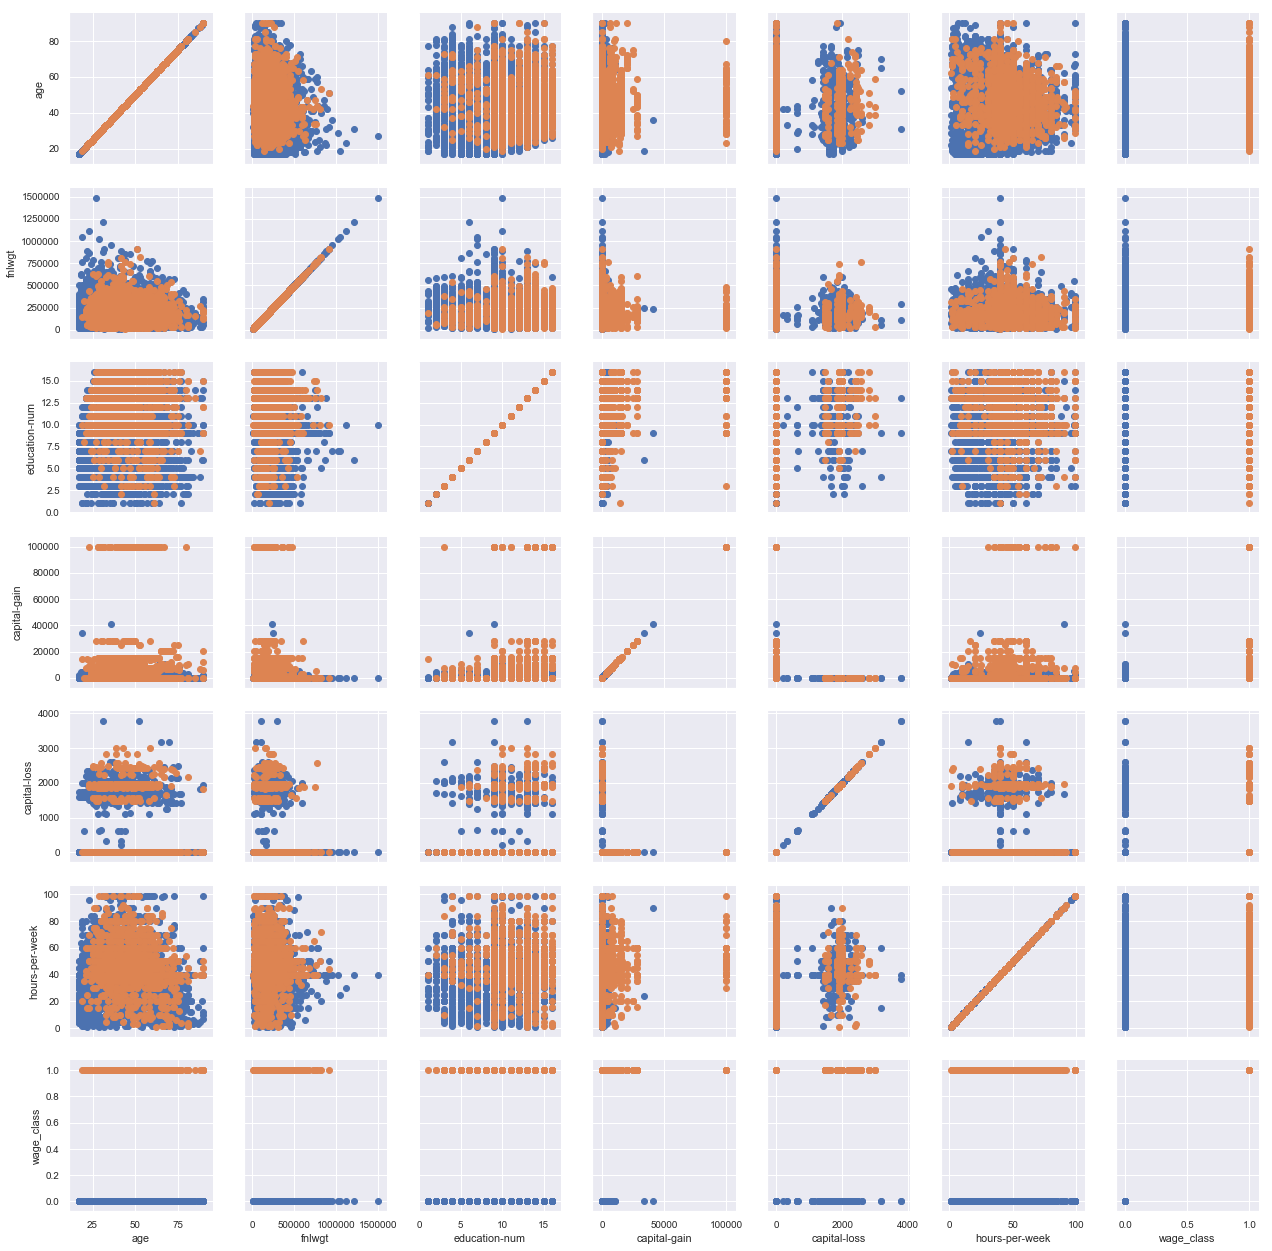

In [105]:
print("Function for visual analysis of Feature and target variable , get_wage_class_relationship_withOtherFeatures()",get_wage_class_relationship_withOtherFeatures.__doc__,"\n")
print("The features dependency of dataset")
get_wage_class_relationship_withOtherFeatures(dataframe=df_Test_AdultData , dependent_variable='wage_class')

In [106]:
# Applu function to get columns names from training dataset
print("Function for getting object columns get_object_cols() :",get_object_cols.__doc__,"\n")
print("Columns name(which have object type data) are:")
object_cols_test=get_object_cols(df_Test_AdultData)
object_cols_test

Function for getting object columns get_object_cols() : This function will return column name which has string/object type data in dataframe with column and its class data 

Columns name(which have object type data) are:


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [107]:
# Aplly function to get new feature columns from object columns
print("Function for getting feature columns get_individual_feature_cols():",get_individual_feature_cols.__doc__,"\n")

df_Test_AdultData= get_individual_feature_cols(datafarme=df_Test_AdultData, objct_cols=object_cols_test)

# Check shape of dataset 
print(get_shape_of_dataset(df_Test_AdultData))

df_Test_AdultData.head(2)

Function for getting feature columns get_individual_feature_cols(): This function will add new feature/columns based upon object columns and remove those old object columns  

The No. Of rows in dataset : 16276 & the No. Of columns in dataset : 100


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage_class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [108]:
# Select Feature and target dataset from Test dataset

df_Feature_test=df_Test_AdultData[important_cols]
df_Feature_test.head(2)

,fnlwgt,age,hours-per-week,education-num,workclass_Private,occupation_Exec-managerial,occupation_Prof-specialty,education_HS-grad,occupation_Craft-repair,relationship_Husband,occupation_Sales,education_Bachelors,sex_Female,workclass_Self-emp-not-inc,capital-gain
0,226802,25,40,7,1,0,0,0,0,0,0,0,0,0,0
1,89814,38,50,9,1,0,0,1,0,1,0,0,0,0,0


In [109]:
df_Target_test=df_Test_AdultData['wage_class']
df_Target_test[0:10]

0    0
1    0
2    1
3    1
4    0
5    0
6    0
7    1
8    0
9    0
Name: wage_class, dtype: int64

In [110]:
df_Feature_test.shape

(16276, 15)

In [111]:

# Apply Feature, targte and params variable to XGboostmodel with important features returned by model on train set
xgboost_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.9, learning_rate=1.0, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=10, nthread=None, objective='binary:logistic',
       random_state=15, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

In [112]:
# Apply function to get Predicted target variable and predicted targte variable probabilities

y_pred_val_test, y_pred_prob_test = predict_target_variable_prob_values(feature_variable=df_Feature_test ,model=xgboost_model)

print("Predicted target variable (first 5 values):",y_pred_val_test[0:5])
print("Predicted target variable probabilities (first 5 values):\n",y_pred_prob_test[0:5])

Predicted target variable (first 5 values): [0 0 0 1 0]
Predicted target variable probabilities (first 5 values):
 [[9.9999869e-01 1.2933194e-06]
 [6.0041726e-01 3.9958271e-01]
 [8.6435592e-01 1.3564406e-01]
 [3.5762787e-07 9.9999964e-01]
 [1.0000000e+00 2.3494112e-10]]


Confusion matrix for training set :
 [[11023  1407]
 [ 1632  2214]] 

Classification report for training set :
               precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88     12430
        >50K       0.61      0.58      0.59      3846

   micro avg       0.81      0.81      0.81     16276
   macro avg       0.74      0.73      0.74     16276
weighted avg       0.81      0.81      0.81     16276

Confusion Matrix for Actual and Predicted target variable


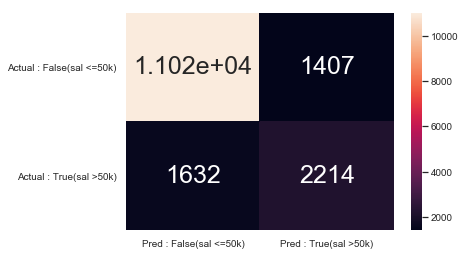

In [113]:
#Applyvalues to variables
actual_target_variable= df_Target_test
predicted_target_variable=y_pred_val_test


print("Confusion matrix for training set :\n",get_confusion_matrix(actual_target_variable,predicted_target_variable), "\n")
print("Classification report for training set :\n",get_classification_report(actual_target_variable,predicted_target_variable))
# Confusion Matrix for Actual and Predicted target variable
get_visual_confusion_matrix(actual_target_variable,predicted_target_variable)

In [114]:
# Apply values to get model evaluation score

actual_target_variable= df_Target_test
predicted_target_variable=y_pred_val_test

# Apply values on function 

accuracy_Score , precision_Score , recall_Score , f1_Score = get_model_eavluation_scores(actual_target_variable,predicted_target_variable)


print("Model Accuracy score (on test set):", accuracy_Score )
print("Model Precision score (on test set):",  precision_Score )
print("Model Recall score (on test set):", recall_Score )
print("Model F-1 score (on test set):", f1_Score )

Model Accuracy score (on test set): 0.8132833620054067
Model Precision score (on test set): 0.6114333057166529
Model Recall score (on test set): 0.5756630265210608
Model F-1 score (on test set): 0.5930092406588992


 On test DataSet , model is able to predict 81% accurate data.

### Problem 3:  Which algorithms are best for this dataset

Logistics, decision tree, random forest , Xgboost , 

with score_pred , classification report , confusion matix ,  evaluation scores


In [115]:
# Parameter for XGboost model

model_params = {'objective':'binary:logistic' , 'max_depth':7, 'learning_rate':1.0,'silent':True , 'booster':'gbtree',
         'n_estimators':400,  'random_state':15 ,'subsample':0.6,'gamma':0.9 , 'n_jobs':10}
# Model names for Classification model comparison
model_names=["Decision Tree", "Random Forest", "XGBoost", "Logistics Regression"]
# Apply model to some variables

dec_tree_clf = DecisionTreeClassifier(max_depth=5)
xgboost_clf = XGBClassifier(**model_params)
random_forest_clf = RandomForestClassifier(n_estimators=100)
logistics_clf = LogisticRegression()

model_classifiers=[dec_tree_clf, random_forest_clf,xgboost_clf, logistics_clf]


In [116]:
# Fit the Models into classifiers


for clf in zip(model_names, model_classifiers):
    clf[1].fit(df_Feature_test, df_Target_test) 
   

In [117]:
# Model Comparison
classification_models = pd.DataFrame(index=['accuracy_score','precision_score','recall_score','f1-score' ,'roc_auc_score' ], 
                      columns=['logistic_regression','decision_tree','random_forest','xgboost'])

In [118]:
classification_models.loc['accuracy_score','logistic_regression'] = accuracy_score(y_true= df_Target_test , y_pred= logistics_clf.predict(df_Feature_test) )
classification_models.loc['precision_score','logistic_regression'] = precision_score(y_true= df_Target_test , y_pred= logistics_clf.predict(df_Feature_test))
classification_models.loc['recall_score','logistic_regression'] = recall_score(y_true= df_Target_test , y_pred=logistics_clf.predict(df_Feature_test) )
classification_models.loc['f1-score','logistic_regression'] = f1_score(y_true= df_Target_test, y_pred= logistics_clf.predict(df_Feature_test))
classification_models.loc['roc_auc_score','logistic_regression'] = roc_auc_score(y_true= df_Target_test , y_score=logistics_clf.predict(df_Feature_test))

classification_models.loc['accuracy_score','decision_tree'] = accuracy_score(y_true= df_Target_test , y_pred= dec_tree_clf.predict(df_Feature_test) )
classification_models.loc['precision_score','decision_tree'] = precision_score(y_true= df_Target_test , y_pred= dec_tree_clf.predict(df_Feature_test))
classification_models.loc['recall_score','decision_tree'] = recall_score(y_true= df_Target_test , y_pred= dec_tree_clf.predict(df_Feature_test) )
classification_models.loc['f1-score','decision_tree'] = f1_score(y_true= df_Target_test, y_pred= dec_tree_clf.predict(df_Feature_test))
classification_models.loc['roc_auc_score','decision_tree'] = roc_auc_score(y_true= df_Target_test , y_score= dec_tree_clf.predict(df_Feature_test))

classification_models.loc['accuracy_score','random_forest'] = accuracy_score(y_true= df_Target_test , y_pred= random_forest_clf.predict(df_Feature_test) )
classification_models.loc['precision_score','random_forest'] = precision_score(y_true= df_Target_test , y_pred= random_forest_clf.predict(df_Feature_test))
classification_models.loc['recall_score','random_forest'] = recall_score(y_true= df_Target_test , y_pred= random_forest_clf.predict(df_Feature_test) )
classification_models.loc['f1-score','random_forest'] = f1_score(y_true= df_Target_test, y_pred= random_forest_clf.predict(df_Feature_test))
classification_models.loc['roc_auc_score','random_forest'] = roc_auc_score(y_true= df_Target_test , y_score= random_forest_clf.predict(df_Feature_test))

classification_models.loc['accuracy_score','xgboost'] = accuracy_score(y_true= df_Target_test , y_pred= xgboost_clf.predict(df_Feature_test) )
classification_models.loc['precision_score','xgboost'] = precision_score(y_true= df_Target_test , y_pred= xgboost_clf.predict(df_Feature_test))
classification_models.loc['recall_score','xgboost'] = recall_score(y_true= df_Target_test , y_pred= xgboost_clf.predict(df_Feature_test) )
classification_models.loc['f1-score','xgboost'] = f1_score(y_true= df_Target_test, y_pred= xgboost_clf.predict(df_Feature_test))
classification_models.loc['roc_auc_score','xgboost'] = roc_auc_score(y_true= df_Target_test , y_score=xgboost_clf.predict(df_Feature_test))



In [119]:
print(" Different evaluation scores of Classifiers")
classification_models

 Different evaluation scores of Classifiers


,logistic_regression,decision_tree,random_forest,xgboost
accuracy_score,0.796,0.845,1.000,0.999
precision_score,0.764,0.738,1.000,0.998
recall_score,0.196,0.535,0.999,0.997
f1-score,0.312,0.620,1.000,0.998
roc_auc_score,0.589,0.738,1.000,0.998


In [120]:
# Confusion Matrix , Classification Report for different classifiers 
for clf in zip(model_names, model_classifiers):
    print(clf[0],"\n")
    pred = clf[1].predict(df_Feature_test)
    print("confusion_matrix:\n",confusion_matrix(pred, df_Target_test),"\n")
    print("classification_report:\n",classification_report(pred, df_Target_test , target_names=['<=50K' , '>50K']))
    print('*'*50)  
    

Decision Tree 

confusion_matrix:
 [[11698  1789]
 [  732  2057]] 

classification_report:
               precision    recall  f1-score   support

       <=50K       0.94      0.87      0.90     13487
        >50K       0.53      0.74      0.62      2789

   micro avg       0.85      0.85      0.85     16276
   macro avg       0.74      0.80      0.76     16276
weighted avg       0.87      0.85      0.85     16276

**************************************************
Random Forest 

confusion_matrix:
 [[12430     3]
 [    0  3843]] 

classification_report:
               precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     12433
        >50K       1.00      1.00      1.00      3843

   micro avg       1.00      1.00      1.00     16276
   macro avg       1.00      1.00      1.00     16276
weighted avg       1.00      1.00      1.00     16276

**************************************************
XGBoost 

confusion_matrix:
 [[12421    10]
 [    9  3836]] 

While comparing the diffrent classification models , it can be seen that   <b>" Random Forest "</b> model is the best classification model for dataset.